# Pandas

## Część I

Będziemy przetwarzać dane z Kaggle odnośnie imion dzieci w USA.

Krok 0: wczytaj pandas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Krok 1: wczytaj dane z pliku `US_Baby_Names_right.csv` z katalogu `lab12_files`

Krok 2: przypisz dane do zmiennej `baby_names`. Zobacz jakiego typu dane są przechowywane i ile jest rekordów

In [2]:
baby_names = pd.read_csv("US_Baby_Names_right.csv")

print("Data types:", baby_names.dtypes, sep="\n", end="\n\n")
print("Data length:", len(baby_names), sep="\n")

Data types:
Unnamed: 0     int64
Id             int64
Name          object
Year           int64
Gender        object
State         object
Count          int64
dtype: object

Data length:
1016395


Krok 3: podejrzy pierwszych 10 rekordów ze zbioru

In [3]:
baby_names.head(10)

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41
5,11354,11355,Abigail,2004,F,AK,37
6,11355,11356,Olivia,2004,F,AK,33
7,11356,11357,Isabella,2004,F,AK,30
8,11357,11358,Alyssa,2004,F,AK,29
9,11358,11359,Sophia,2004,F,AK,28


Krok 4: usuń kolumny 'Unnamed: 0' oraz 'Id' 

In [4]:
baby_names.drop(columns=["Unnamed: 0", "Id"], inplace=True)
baby_names

,Name,Year,Gender,State,Count
0,Emma,2004,F,AK,62
1,Madison,2004,F,AK,48
2,Hannah,2004,F,AK,46
3,Grace,2004,F,AK,44
4,Emily,2004,F,AK,41
...,...,...,...,...,...
1016390,Seth,2014,M,WY,5
1016391,Spencer,2014,M,WY,5
1016392,Tyce,2014,M,WY,5
1016393,Victor,2014,M,WY,5


Krok 5: czy w zbiorze jest więcej imion kobiet, czy mężczyzn?

In [5]:
print("Women:", len(baby_names[baby_names["Gender"] == "F"]))
print("Men:", len(baby_names[baby_names["Gender"] == "M"]))
# Wniosek jest wiecej kobiet

Women: 558846
Men: 457549


Krok 6: zgrupuj wiersze względem imion i wypisz 10 najczęściej pojawiających się imion.

In [6]:
grouped_baby_names = baby_names.groupby("Name").agg({
    "Count": "sum",
    "Gender": "first"
})
grouped_baby_names.sort_values(by='Count', ascending=False, inplace=True)
grouped_baby_names.reset_index(inplace=True)
grouped_baby_names.head(10)

,Name,Count,Gender
0,Jacob,242874,M
1,Emma,214852,F
2,Michael,214405,M
3,Ethan,209277,M
4,Isabella,204798,F
5,William,197894,M
6,Joshua,191551,M
7,Sophia,191446,F
8,Daniel,191440,M
9,Emily,190318,F


Krok 7: wyniki z Kroku 6 zaprezentuj na wykresie korzystając z `matplotlib`. Przygotuj trzy wykresy, tj. 10 najczęsciej występujących imion: ogółem, u mężczyzn i u kobiet.

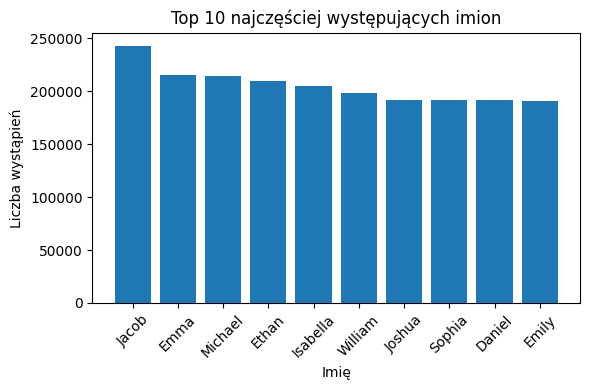

In [7]:
top10 = grouped_baby_names.head(10)

plt.figure(figsize=(6, 4))
plt.bar(top10['Name'], top10['Count'])
plt.title('Top 10 najczęściej występujących imion')
plt.xlabel('Imię')
plt.ylabel('Liczba wystąpień')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

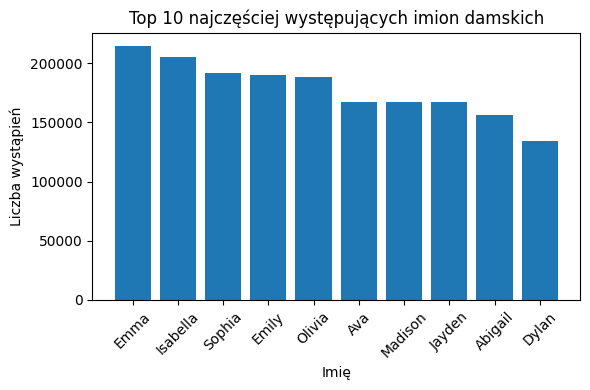

In [8]:
top10women = grouped_baby_names[grouped_baby_names["Gender"] == "F"].head(10)

plt.figure(figsize=(6, 4))
plt.bar(top10women['Name'], top10women['Count'])
plt.title('Top 10 najczęściej występujących imion damskich')
plt.xlabel('Imię')
plt.ylabel('Liczba wystąpień')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

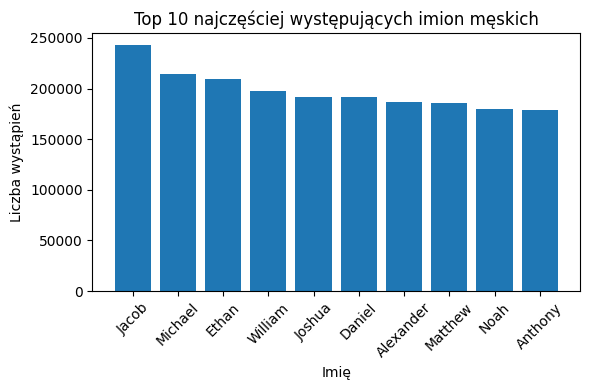

In [9]:
top10men = grouped_baby_names[grouped_baby_names["Gender"] == "M"].head(10)

plt.figure(figsize=(6, 4))
plt.bar(top10men['Name'], top10men['Count'])
plt.title('Top 10 najczęściej występujących imion męskich')
plt.xlabel('Imię')
plt.ylabel('Liczba wystąpień')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Krok 8: Jak wiele różnych imion występuje w zbiorze?

In [10]:
len(grouped_baby_names) # pogrupowane dane daja nam tylko distinct imiona

17632

Krok 9: Przygotuj generator imion, losujący je zgodnie z rozkłądem prawdopodobieństwa otrzymanym na podstawie przetwarzanego pliku

In [11]:
probability_distribution = grouped_baby_names.set_index('Name')['Count'] / grouped_baby_names['Count'].sum()

def generate_name():
    return np.random.choice(probability_distribution.index, p=probability_distribution.values)

generated_names = [generate_name() for _ in range(10)]
print("Wygenerowane imiona:")
print(generated_names)

Wygenerowane imiona:
['Khloe', 'Oliver', 'Juliette', 'Joseph', 'Nathan', 'Aiden', 'Finn', 'Olivia', 'Jackson', 'Sean']


Krok 10: 
- Jakie imie występuje najczęściej?
- Wyznacz średnią, medianę i odchylenie stanadrdowe wystepowania imion.

In [12]:
# Najczęściej występujące imię to jest pierwsze w zgrupowanym posortowanym dataframe czyli Jacob

# Średnia występowania imion
srednia = grouped_baby_names['Count'].mean()
print(f"Średnia występowania imion: {srednia}")

# Mediana występowania imion
mediana = grouped_baby_names['Count'].median()
print(f"Mediana występowania imion: {mediana}")

# Odchylenie standardowe występowania imion
odchylenie_standardowe = grouped_baby_names['Count'].std()
print(f"Odchylenie standardowe występowania imion: {odchylenie_standardowe}")

Średnia występowania imion: 2008.932168784029
Mediana występowania imion: 49.0
Odchylenie standardowe występowania imion: 11006.069467890571


## Część II

Krok 1: Wczytaj dane

In [13]:
df = pd.read_csv("ocupation.csv", sep="|")

Krok 2: Podejrzyj pierwsze 25 rekordów

In [14]:
df.head(25)

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


Krok 3: Podejrzyj ostatnie 10 rekordów

In [15]:
df.tail(10)

,user_id,age,gender,occupation,zip_code
933,934,61,M,engineer,22902
934,935,42,M,doctor,66221
935,936,24,M,other,32789
936,937,48,M,educator,98072
937,938,38,F,technician,55038
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209
942,943,22,M,student,77841


Krok 4: Ile jest obserwacji w zbiorze? Ile jest kolumn w zbiorze?

In [16]:
print("Ilość pbserwacji w zbiorze:", len(df))
print("Ilość kolumn w zbiorze:", len(df.columns))

Ilość pbserwacji w zbiorze: 943
Ilość kolumn w zbiorze: 5


Krok 5: Wypisz nazwy kolumn

In [17]:
tuple(df.columns)

('user_id', 'age', 'gender', 'occupation', 'zip_code')

Krok 6: Ile różnych zawodów jest w zbiorze?

In [18]:
len(df.occupation.value_counts())

21

Krok 7: Przygotuj efektywny wykres na którym przedstawisz procetowy udział poszczególnych zawodów w zbiorze na charplocie
Wykorzystaj https://matplotlib.org/examples/pie_and_polar_charts/pie_demo_features.html

Przygotuj dwa wykresy: 
- jeden z wszystkimi zawodami
- drugi z 10 najcześtrzymi zawodami, pozostałem zawody trafiają do kategorii `Inne`

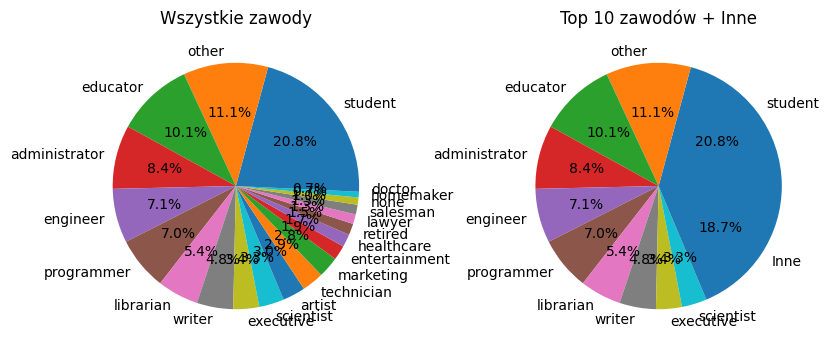

In [19]:
occupation_counts = df.occupation.value_counts()

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.pie(occupation_counts, labels=occupation_counts.index, autopct='%1.1f%%')
plt.title('Wszystkie zawody')

top_10 = occupation_counts.head(10)
other = occupation_counts[10:].sum() 

top_10_labels = top_10.index.tolist()
top_10_values = top_10.tolist()
top_10_labels.append('Inne')
top_10_values.append(other)

plt.subplot(1, 2, 2)
plt.pie(top_10_values, labels=top_10_labels, autopct='%1.1f%%')
plt.title('Top 10 zawodów + Inne')

plt.show()

Krok 8: Przygotuj efektywny wykres na którym przedstawisz 10 najczęstrzych zawodów oraz ile pracuje w nich kobiet a ilu meżczyzn
Wykorzystaj https://matplotlib.org/gallery/api/barchart.html#sphx-glr-gallery-api-barchart-py

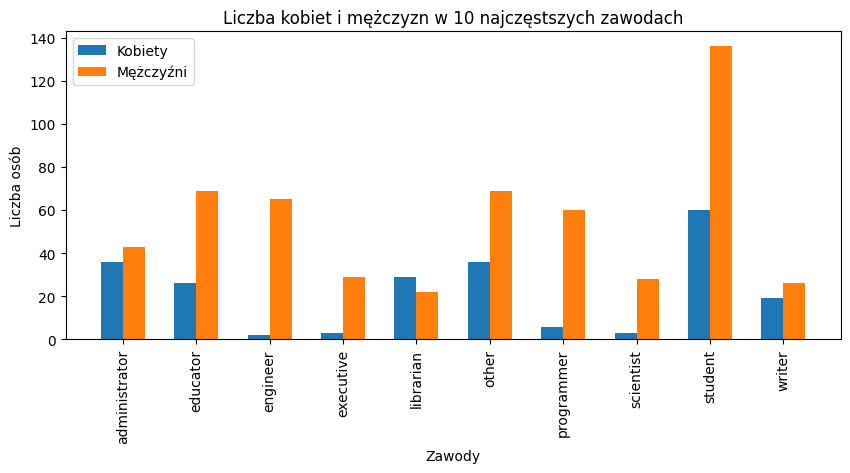

In [20]:
df_top_10 = df[df['occupation'].isin(df['occupation'].value_counts().head(10).index.tolist())]
gender_counts = df_top_10.groupby(['occupation', 'gender']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 4))

bar_width = 0.3
index = range(len(gender_counts))

plt.bar(index, gender_counts['F'], bar_width, label='Kobiety')
plt.bar([i + bar_width for i in index], gender_counts['M'], bar_width, label='Mężczyźni')
plt.xticks([i + bar_width / 2 for i in index], gender_counts.index, rotation=90)

plt.xlabel('Zawody')
plt.ylabel('Liczba osób')
plt.title('Liczba kobiet i mężczyzn w 10 najczęstszych zawodach')
plt.legend()

plt.show()

Krok 9: Przygotuj efektywny wykres na którym przedstawisz średni wiek pracowników danego zawodu

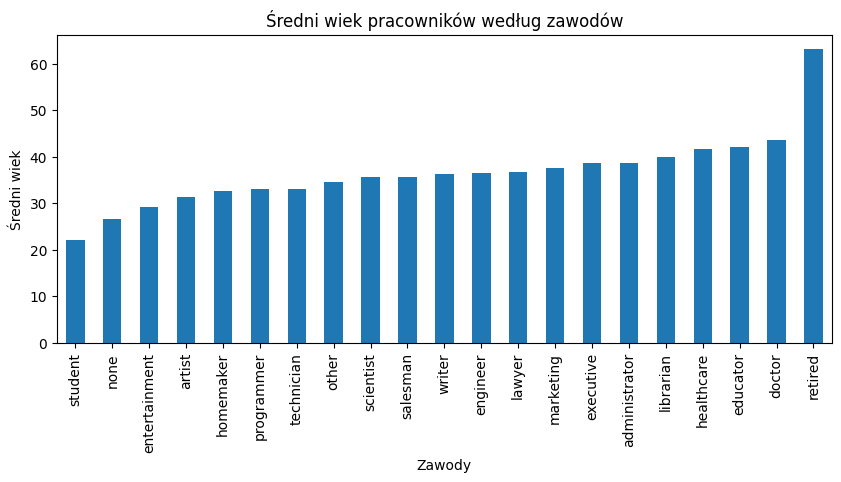

In [21]:
plt.figure(figsize=(10, 4))

df.groupby('occupation')['age'].mean().sort_values().plot(kind='bar')

plt.xlabel('Zawody')
plt.ylabel('Średni wiek')
plt.title('Średni wiek pracowników według zawodów')

plt.show()

Krok 10: Przygotuj efektywny wykres na którym przedstawisz średni wiek kobiet i mężczyzn wykonujących dany zawód.

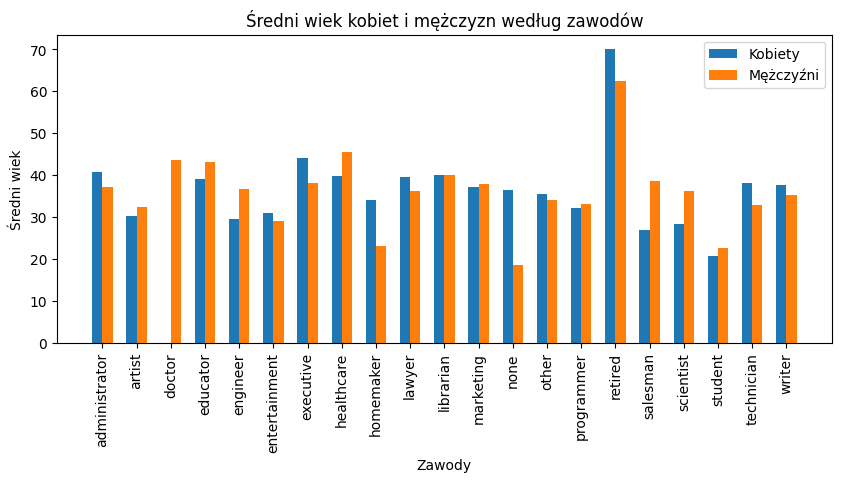

In [22]:
plt.figure(figsize=(10, 4))

bar_width = 0.3
average_age = df.groupby(['occupation', 'gender'])['age'].mean().unstack()
index = range(len(average_age))

plt.bar(index, average_age['F'], bar_width, label='Kobiety')
plt.bar([i + bar_width for i in index], average_age['M'], bar_width, label='Mężczyźni')
plt.xticks([i + bar_width / 2 for i in index], average_age.index, rotation=90)

plt.xlabel('Zawody')
plt.ylabel('Średni wiek')
plt.title('Średni wiek kobiet i mężczyzn według zawodów')
plt.legend()

plt.show()